# Import Libraries

In [1]:
import os
from fastai.vision import *
from fastai.metrics import *
from pathlib import Path

# Loading Data and Feature Engineering

In [2]:
data_folder = Path('../data/source_data/')

Load the data with batch size 16 (seems to work the best with the machine I am using) and apply transformations to the images as the real users will never have such perfect photos!

In [3]:
data = ImageDataBunch.from_folder(data_folder, bs=16, 
                                  size=224, train='train', 
                                  test='test', valid='valid', 
                                  ds_tfms = get_transforms())

Display the resulting images.

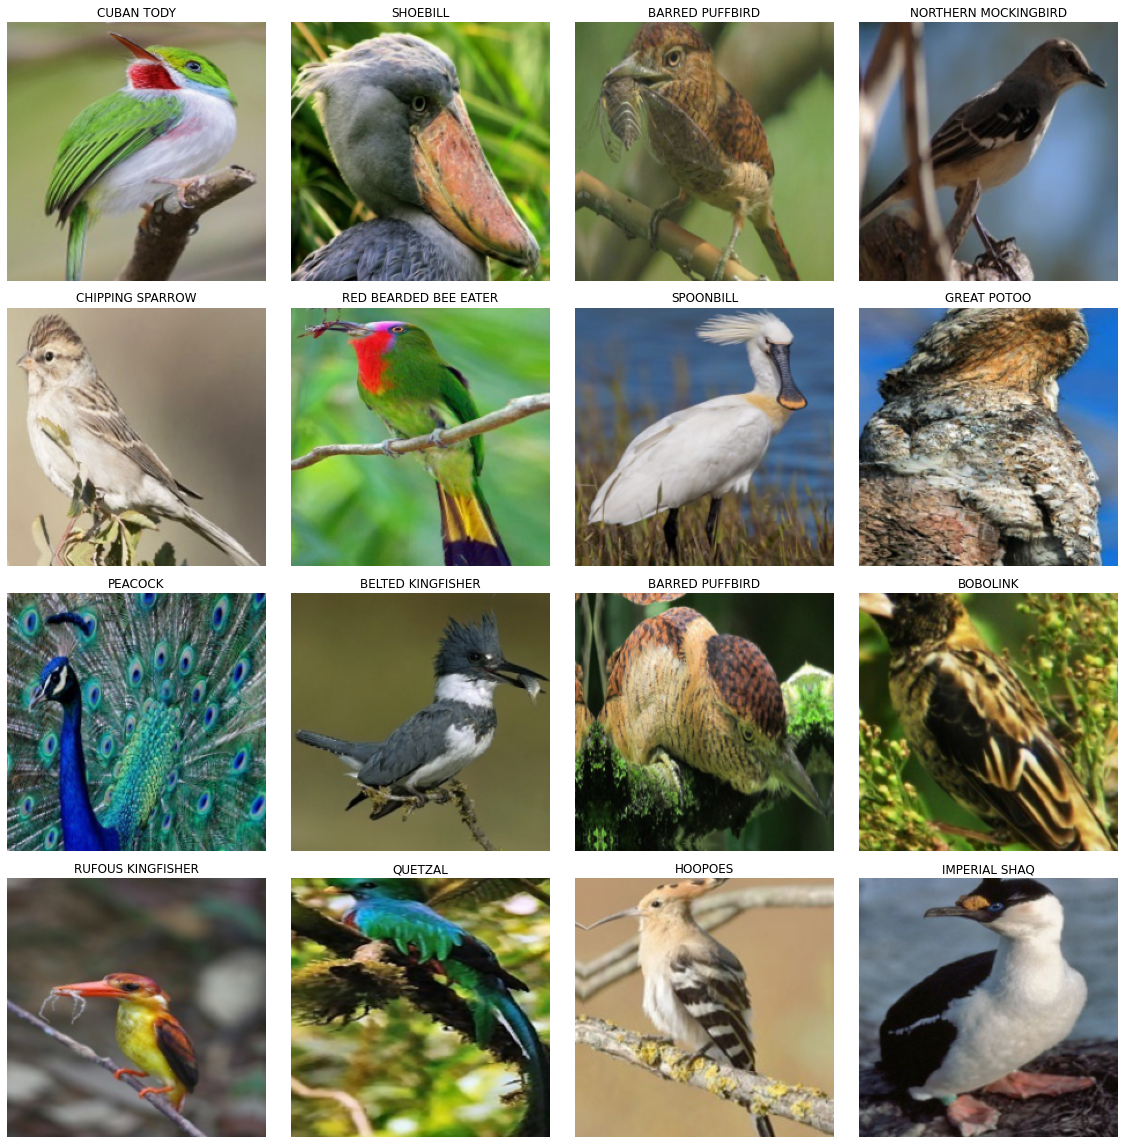

In [4]:
data.show_batch()

# Define, Train and Evaluate Model

We are using a pretrained model and further training it as such models usually already have learn some useful features that can be transfered to other image datasets. Resnet18 was chosen as it seems to offer good results for the time it takes to train.

In [5]:
model = cnn_learner(data, models.resnet18, metrics=accuracy)

FastAI is amazing and evaluates model itself after each training epoch.

In [6]:
model.fit(epochs=10)

epoch,train_loss,valid_loss,accuracy,time
0,1.133932,0.308948,0.913962,1:10:38
1,0.959285,0.200577,0.947170,1:09:59
2,0.810131,0.167024,0.948679,1:10:02
3,0.749718,0.167080,0.959245,1:10:07
4,0.734802,0.147983,0.961509,1:10:10
5,0.705686,0.156171,0.955472,1:10:13
6,0.686706,0.148387,0.956226,1:11:25
7,0.714969,0.129173,0.962264,1:11:38
8,0.586339,0.149707,0.957736,1:11:51
9,0.577134,0.129814,0.965283,1:12:04


96.5% is an amazing accuracy! Lets leave it as it is as we will not get any significantly better results even if we try to improve the model as it is already very good.

# Saving trained model

In [9]:
model.export(os.path.abspath('../data/pickles/trained_model.pkl'))